In [3]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [5]:
df = pd.read_csv('beyonce_tracks.csv')
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       336 non-null    object 
 1   track_name        336 non-null    object 
 2   album_name        336 non-null    object 
 3   is_explicit       336 non-null    bool   
 4   genres            336 non-null    object 
 5   release_date      336 non-null    object 
 6   track_id          336 non-null    object 
 7   danceability      336 non-null    float64
 8   valence           336 non-null    float64
 9   energy            336 non-null    float64
 10  loudness          336 non-null    float64
 11  acousticness      336 non-null    float64
 12  instrumentalness  336 non-null    float64
 13  liveness          336 non-null    float64
 14  speechiness       336 non-null    float64
 15  key               336 non-null    int64  
 16  tempo             336 non-null    float64
 1

In [7]:
df.describe()

,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.612640,0.490362,0.682492,-7.289720,0.138767,0.079687,0.305424,0.168143,5.181548,121.615961,0.651786,250289.229167,3.922619
std,0.155603,0.233648,0.189090,2.854806,0.219504,0.209146,0.265685,0.150844,3.568488,29.594229,0.477115,98478.940431,0.408814
min,0.143000,0.038800,0.045200,-27.432000,0.000066,0.000000,0.016200,0.027100,0.000000,66.930000,0.000000,16373.000000,1.000000
25%,0.508750,0.323000,0.557750,-8.451000,0.005295,0.000000,0.097200,0.053650,1.000000,97.076500,0.000000,200813.000000,4.000000
50%,0.635000,0.489500,0.715000,-6.750500,0.037200,0.000020,0.201000,0.106500,6.000000,123.015000,1.000000,228933.000000,4.000000
75%,0.725250,0.651000,0.821750,-5.446750,0.158000,0.005510,0.392750,0.254750,8.000000,136.039000,1.000000,278884.750000,4.000000
max,0.925000,0.971000,0.993000,-2.706000,0.994000,0.937000,0.983000,0.940000,11.000000,216.788000,1.000000,597520.000000,5.000000


In [8]:
print(df.isnull().sum())

artist_name         0
track_name          0
album_name          0
is_explicit         0
genres              0
release_date        0
track_id            0
danceability        0
valence             0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
key                 0
tempo               0
mode                0
duration_ms         0
time_signature      0
dtype: int64


In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [10]:
# Convert 'key', 'mode', and 'time_signature' to categorical variables
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')

# Check the dtypes again to confirm the changes
print(df.dtypes)

artist_name                 object
track_name                  object
album_name                  object
is_explicit                   bool
genres                      object
release_date        datetime64[ns]
track_id                    object
danceability               float64
valence                    float64
energy                     float64
loudness                   float64
acousticness               float64
instrumentalness           float64
liveness                   float64
speechiness                float64
key                       category
tempo                      float64
mode                      category
duration_ms                  int64
time_signature            category
dtype: object


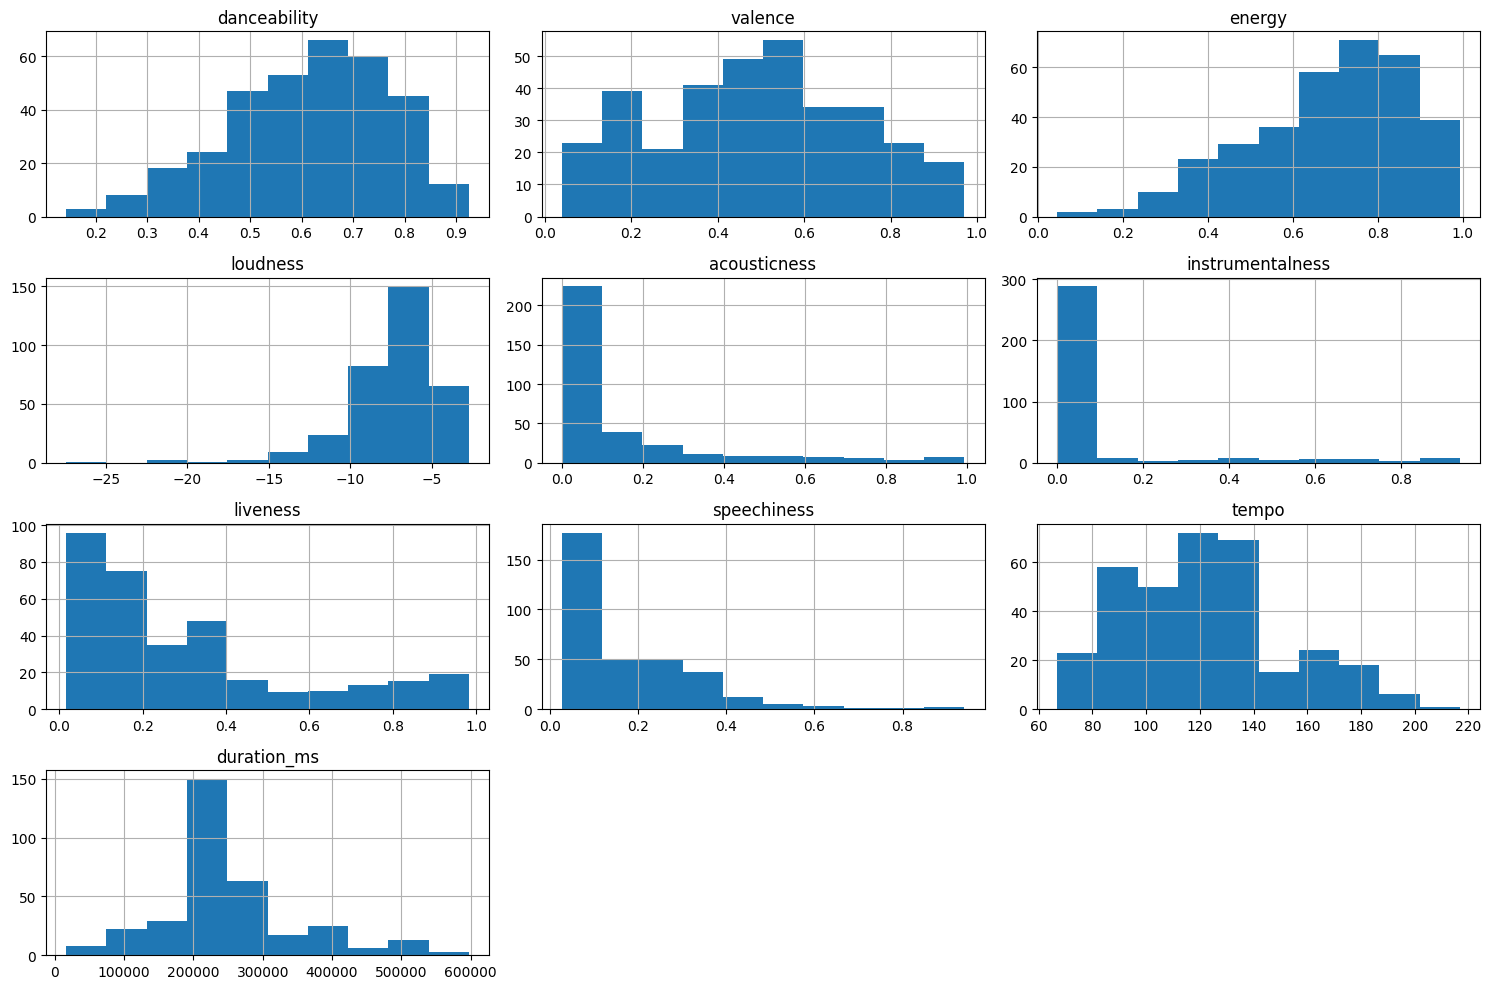

In [11]:
# Select Numerical Columns to plot
num_cols = ['danceability', 'valence', 'energy', 'loudness', 'acousticness',
            'instrumentalness', 'liveness', 'speechiness', 'tempo', 'duration_ms']
# Plot histograms
df[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [12]:
# Set the colorblind palette
sns.set_palette("colorblind")


    year    energy
0   2002  0.750000
1   2003  0.482482
2   2004  0.471500
3   2006  0.773878
4   2007  0.754348
5   2008  0.545882
6   2009  0.749465
7   2010  0.772269
8   2011  0.709778
9   2014  0.553550
10  2016  0.486000
11  2019  0.697809
12  2020  0.534800
13  2022  0.710650
14  2023  0.604833
15  2024  0.515500


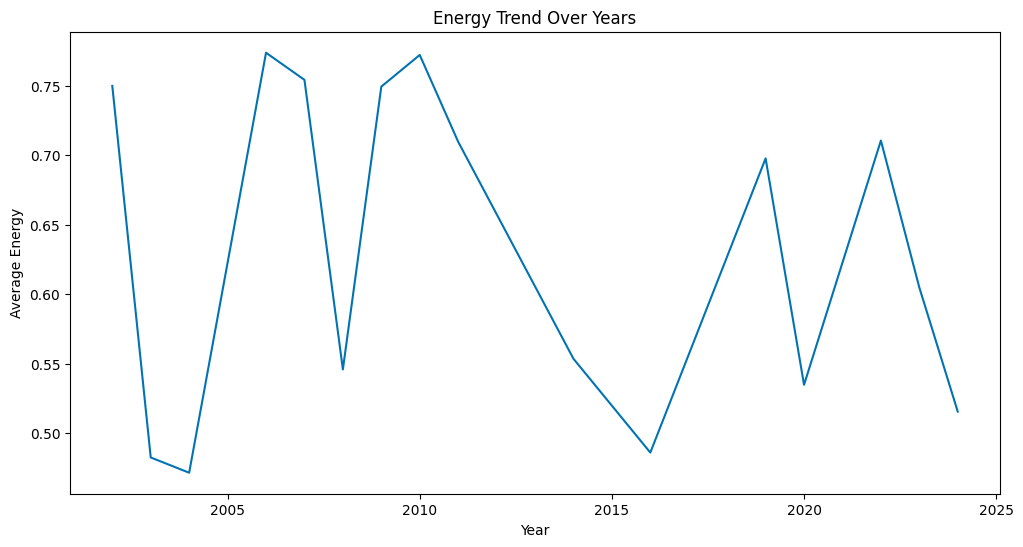

In [13]:
# Group by release year
df['year'] = df['release_date'].dt.year
energy_trend = df.groupby('year')['energy'].mean().reset_index()
print(energy_trend)

plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='energy',data=energy_trend)
plt.title('Energy Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.show()

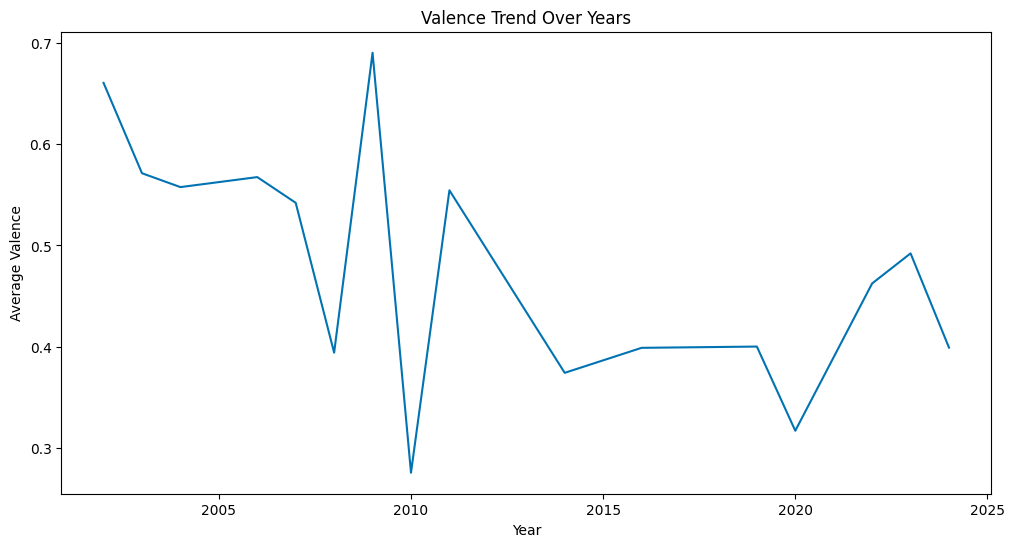

In [14]:
# Calculate valence mean
valence_trend = df.groupby('year')['valence'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='valence', data=valence_trend)
plt.title('Valence Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.show()

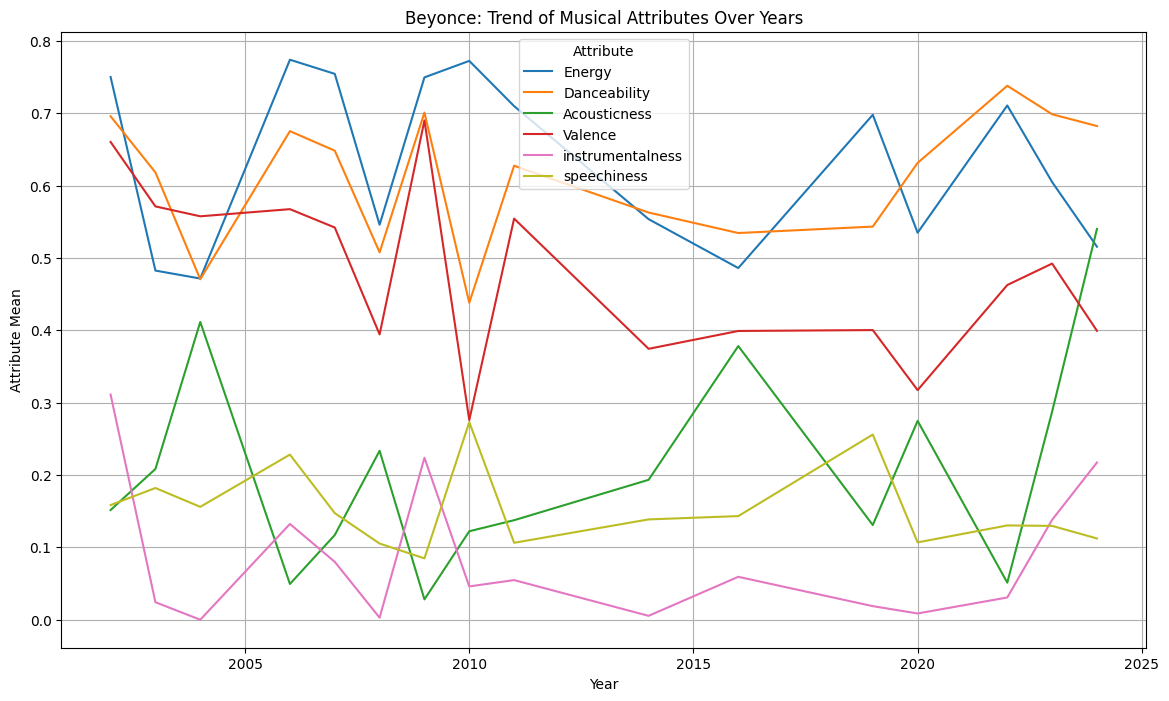

In [15]:
# Group the data by year and calculate the mean of the numerical variables
yearly_means = df.groupby('year')[['energy',
                                   'danceability',
                                   'acousticness',
                                   'valence',
                                   'instrumentalness',
                                   'speechiness']].mean().reset_index()

# Plot
plt.figure(figsize=(14, 8))

# Energy
sns.lineplot(x='year', y='energy', data=yearly_means, label='Energy', color='tab:blue')
# Danceability
sns.lineplot(x='year', y='danceability', data=yearly_means, label='Danceability', color='tab:orange')
# Acousticness
sns.lineplot(x='year', y='acousticness', data=yearly_means, label='Acousticness', color='tab:green')
# Valence
sns.lineplot(x='year', y='valence', data=yearly_means, label='Valence', color='tab:red')
# Instrumentalness
sns.lineplot(x='year', y='instrumentalness', data=yearly_means, label='instrumentalness', color='tab:pink')
# Speechiness
sns.lineplot(x='year', y='speechiness', data=yearly_means, label='speechiness', color='tab:olive')

plt.title('Beyonce: Trend of Musical Attributes Over Years')
plt.xlabel('Year')
plt.ylabel('Attribute Mean')
plt.legend(title='Attribute')
plt.grid(True)
plt.show()

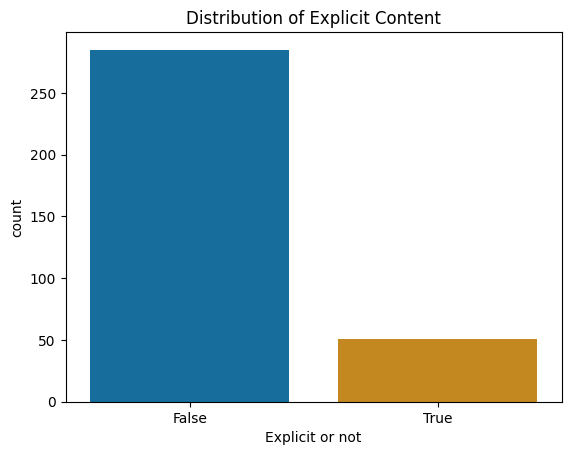

In [16]:
# Count plot for explicit content
sns.countplot(x='is_explicit', data=df, palette="colorblind")
plt.title('Distribution of Explicit Content')
plt.xlabel('Explicit or not')
plt.show()